In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [3]:
train_data_file = "/content/gdrive/My Drive/pite_projekt/data.csv"
data = pd.read_csv(train_data_file).sample(100000)
print(data.columns)
features = data.drop(["is_true_seed","has_MCParticle",
                      "is_downstream_reconstructible",
                      "has_MCParticle_not_electron",
                     "is_downstream_reconstructible_not_electron",
                     "seed_mva_value", "seed_p",
                     "seed_nbIT", "seed_tx", "seed_ty"], axis=1).astype(np.float64)
print(features.columns)
y = data.is_downstream_reconstructible.values
X = features.drop(features.columns[0], axis=1).values

Index(['Unnamed: 0', 'has_MCParticle', 'is_downstream_reconstructible',
       'has_MCParticle_not_electron',
       'is_downstream_reconstructible_not_electron', 'is_true_seed',
       'seed_chi2PerDoF', 'seed_p', 'seed_pt', 'seed_nLHCbIDs', 'seed_nbIT',
       'seed_nLayers', 'seed_x', 'seed_y', 'seed_tx', 'seed_ty',
       'seed_mva_value'],
      dtype='object')
Index(['Unnamed: 0', 'seed_chi2PerDoF', 'seed_pt', 'seed_nLHCbIDs',
       'seed_nLayers', 'seed_x', 'seed_y'],
      dtype='object')


In [84]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

[[ 0.26586665 -0.03961703  0.44012665  0.71745571 -0.33344103 -0.21736944]
 [-0.36484339 -0.04666028  1.5135225   0.71745571  1.53629648  0.24685122]
 [-1.07221474 -0.03181138 -1.27730671  0.71745571 -0.11586523  0.28014955]
 ...
 [-0.65915597 -0.00704931 -1.70666505 -2.20874528  0.25213029  0.20073798]
 [-0.44045687 -0.04117637  0.22544748 -1.23334495  1.16016717 -0.13516968]
 [-0.31648836  0.00680843  1.08416416  0.71745571  2.18379819 -1.12108815]]


In [0]:
clf = GaussianNB()
grid_values = {'var_smoothing' : [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, cv = 3, n_jobs = -1, verbose = 2)


In [74]:
grid_clf_acc.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  24 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GaussianNB(priors=None, var_smoothing=1e-09), iid='warn',
             n_jobs=-1,
             param_grid={'var_smoothing': [0.0001, 1e-05, 1e-06, 1e-07, 1e-08,
                                           1e-09, 1e-10, 1e-11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [75]:
pred_clf = grid_clf_acc.predict(X_test)
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

       False       0.74      0.50      0.60      9221
        True       0.67      0.85      0.75     10779

    accuracy                           0.69     20000
   macro avg       0.70      0.68      0.67     20000
weighted avg       0.70      0.69      0.68     20000

[[4638 4583]
 [1613 9166]]


In [0]:
proba = grid_clf_acc.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, proba[:,1])

In [80]:
print('Accuracy Score : ' + str(accuracy_score(y_test, pred_clf)))
print('Precision Score : ' + str(precision_score(y_test, pred_clf)))
print('Recall Score : ' + str(recall_score(y_test, pred_clf)))
print('F1 Score : ' + str(f1_score(y_test, pred_clf)))

Accuracy Score : 0.6902
Precision Score : 0.6666666666666666
Recall Score : 0.8503571759903517
F1 Score : 0.7473907371167644


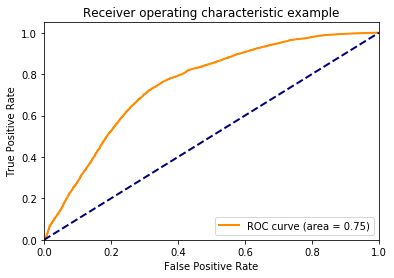

In [77]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [0]:
clf = KNeighborsClassifier()
#grid_values = {'n_neighbors': [x for x in range(100, 200,3)],'algorithm':['auto'], 'leaf_size': [x for x in range(50, 200, 10)], 'p': [1, 2]}
grid_values = {'n_neighbors': [x for x in range(1, 1000, 1)],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [x for x in range(1, 1000, 1)], 'p': [1, 2]}
#grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring = 'precision', cv = 3, n_jobs = -1, verbose = 2)
grid_clf_acc = RandomizedSearchCV(estimator = clf, param_distributions = grid_values, n_iter = 400, cv = 3, verbose=2, random_state=42, n_jobs = -1)


In [0]:
grid_clf_acc.fit(X_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 86.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 135.2min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 157.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=400, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27

In [0]:

pred_kneighborsclassifier = grid_clf_acc.predict(X_test)

In [0]:
print(classification_report(y_test, pred_kneighborsclassifier))
print(confusion_matrix(y_test, pred_kneighborsclassifier))

              precision    recall  f1-score   support

       False       0.80      0.62      0.70      9300
        True       0.72      0.86      0.79     10700

    accuracy                           0.75     20000
   macro avg       0.76      0.74      0.74     20000
weighted avg       0.76      0.75      0.74     20000

[[5740 3560]
 [1447 9253]]


In [0]:
print(grid_clf_acc.best_params_)

{'p': 1, 'n_neighbors': 25, 'leaf_size': 352, 'algorithm': 'kd_tree'}


In [0]:
proba = kneighborsclassifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, proba[:,1])

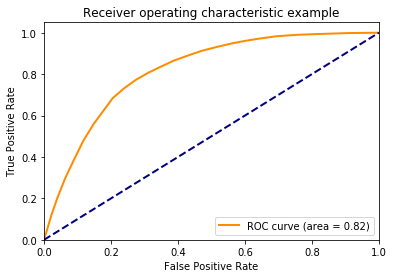

In [92]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [97]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test, pred_kneighborsclassifier)))
print('Precision Score : ' + str(precision_score(y_test, pred_kneighborsclassifier)))
print('Recall Score : ' + str(recall_score(y_test, pred_kneighborsclassifier)))
print('F1 Score : ' + str(f1_score(y_test, pred_kneighborsclassifier)))

Accuracy Score : 0.75245
Precision Score : 0.7526556697469557
Recall Score : 0.8067950379559341
F1 Score : 0.7787855770519637


In [0]:
from sklearn import svm
clf = svm.SVC(gamma = 'scale', probability = True)
clf.fit(X_train, y_train)
pred_svm = clf.predict(X_test)

In [99]:
print('Accuracy Score : ' + str(accuracy_score(y_test, pred_svm)))
print('Precision Score : ' + str(precision_score(y_test, pred_svm)))
print('Recall Score : ' + str(recall_score(y_test, pred_svm)))
print('F1 Score : ' + str(f1_score(y_test, pred_svm)))

Accuracy Score : 0.7194
Precision Score : 0.7115259210955331
Recall Score : 0.808091094241807
F1 Score : 0.7567403554399653


In [102]:
proba = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, proba[:,1])

AttributeError: ignored

In [0]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()